In [3]:
import networkx as nx
G= nx.Graph()
G.nodes(),G.edges()
G.add_nodes_from(["A","B","C","D","E",])
G.nodes(), G.edges()

(NodeView(('A', 'B', 'C', 'D', 'E')), EdgeView([]))

In [4]:
G.add_edges_from([("B","C"),("C","A"),("D","E")])

In [5]:
G.add_edge("C","D")

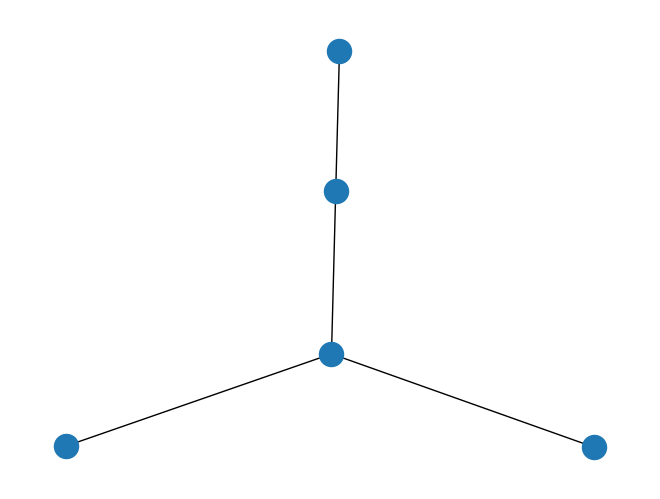

In [8]:
nx.draw_spring(G)

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
G= nx.Graph()

In [25]:
#posiciones de cada nodo (si es que quiero que el grafo se vea de cierta manera)
G.add_nodes_from([("A", {"pos":[3,3]}),
                  ("B", {"pos":[2,-5]}),
                  ("C", {"pos":[5,2]}),
                  ("D", {"pos":[-1,2]}),
                  ("E", {"pos":[4,-5]})])

In [33]:
#pesos entre las conexiones=aristaas
G.add_edges_from([("D","A", {"weight":1.3}),
                  ("A","C", {"weight":3.9}),
                   ("D","E", {"weight":0.8}),
                   ("B","C", {"weight":0.6}),
                   ("A","E", {"weight":2.2}),
                   ("D","B", {"weight":3.4})])

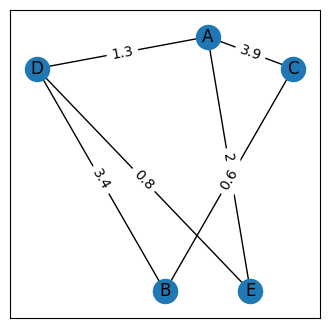

In [39]:
plt.figure(figsize=(4,4))
#agregando posiciones a los nodos podemos agregar los pesos
positions= nx.get_node_attributes(G,"pos")
nx.draw_networkx(G, pos=positions, node_size=300)
weights= nx.get_edge_attributes(G,"weight")
nx.draw_networkx_edge_labels(G, pos=positions, edge_labels=weights);

In [40]:
nx.to_pandas_edgelist(G) #hacer que nx se convierta en pandas para que enliste cada nodo

,source,target,weight
0,A,D,1.3
1,A,C,3.9
2,A,E,2.2
3,B,C,0.6
4,B,D,3.4
5,D,E,0.8


In [41]:
list(G.adjacency())

[('A', {'D': {'weight': 1.3}, 'C': {'weight': 3.9}, 'E': {'weight': 2.2}}),
 ('B', {'C': {'weight': 0.6}, 'D': {'weight': 3.4}}),
 ('C', {'A': {'weight': 3.9}, 'B': {'weight': 0.6}}),
 ('D', {'A': {'weight': 1.3}, 'E': {'weight': 0.8}, 'B': {'weight': 3.4}}),
 ('E', {'D': {'weight': 0.8}, 'A': {'weight': 2.2}})]

In [45]:
matriz_adyacencia=nx.to_pandas_adjacency(G)
matriz_adyacencia

,A,B,C,D,E
A,0.0,0.0,3.9,1.3,2.2
B,0.0,0.0,0.6,3.4,0.0
C,3.9,0.6,0.0,0.0,0.0
D,1.3,3.4,0.0,0.0,0.8
E,2.2,0.0,0.0,0.8,0.0


In [2]:
import pandas as pd
matriz_adyacencia.to_csv("matriz_adyacencia.csv")


NameError: name 'matriz_adyacencia' is not defined

In [55]:
df= pd.read_csv("matriz_adyacencia.csv")
df.set_index("Unnamed: 0", drop=True, inplace=True)
newG= nx.from_pandas_adjacency(df)


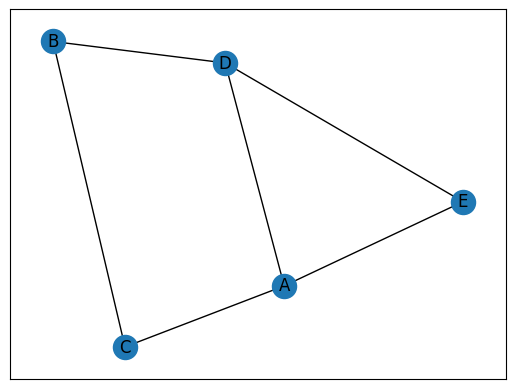

In [56]:
nx.draw_networkx(newG)

In [9]:
import openpyxl as xl
grafo_bidimensional= pd.read_excel("EEG.xlsx")

In [28]:
import matplotlib.pyplot as plt

# Cargar las dos matrices de adyacencia
matriz1 = pd.read_excel("EEG.xlsx", sheet_name="coherence_motorimagery_alpha", index_col=0)
matriz2 = pd.read_excel("EEG.xlsx", sheet_name="coherence_chbmit_interictal", index_col=0)

In [29]:
matriz1


,FP1,F7,T3,C3,C4,T4,F8,FP2
FP1,1.00,0.25,0.18,0.12,0.10,0.09,0.07,0.06
F7,0.25,1.00,0.20,0.15,0.12,0.10,0.08,0.07
T3,0.18,0.20,1.00,0.28,0.22,0.18,0.11,0.10
C3,0.12,0.15,0.28,1.00,0.30,0.25,0.12,0.11
C4,0.10,0.12,0.22,0.30,1.00,0.35,0.14,0.13
T4,0.09,0.10,0.18,0.25,0.35,1.00,0.13,0.12
F8,0.07,0.08,0.11,0.12,0.14,0.13,1.00,0.40
FP2,0.06,0.07,0.10,0.11,0.13,0.12,0.40,1.00


In [30]:
matriz2

,FP1,F7,T3,C3,C4,T4,F8,FP2
FP1,1.00,0.25,0.18,0.12,0.10,0.09,0.07,0.06
F7,0.25,1.00,0.20,0.15,0.12,0.10,0.08,0.07
T3,0.18,0.20,1.00,0.28,0.22,0.18,0.11,0.10
C3,0.12,0.15,0.28,1.00,0.30,0.25,0.12,0.11
C4,0.10,0.12,0.22,0.30,1.00,0.35,0.14,0.13
T4,0.09,0.10,0.18,0.25,0.35,1.00,0.13,0.12
F8,0.07,0.08,0.11,0.12,0.14,0.13,1.00,0.40
FP2,0.06,0.07,0.10,0.11,0.13,0.12,0.40,1.00


In [31]:
G1 = nx.from_pandas_adjacency(matriz1)
G2 = nx.from_pandas_adjacency(matriz2)

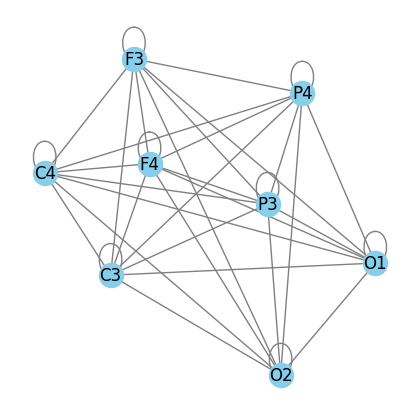

In [43]:

plt.figure(figsize=(4, 4))
pos = nx.spring_layout(G1, seed=42)
nx.draw(G1, pos,with_labels=True, node_color='skyblue', edge_color='gray')
plt.show()

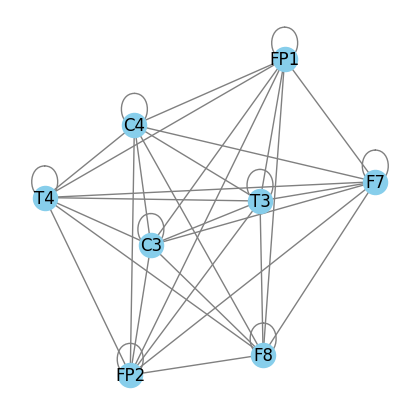

In [39]:
plt.figure(figsize=(4, 4))
pos = nx.spring_layout(G2, seed=42)
nx.draw(G2, pos, with_labels=True, node_color='skyblue', edge_color='gray')
plt.show()